## **Python para Data Science: Clase 07**

### Actividad Práctica: Numpy, Pandas y Librerías de Visualización

#### **Actividad 1: Explorando Series y DataFrames con Pandas y Visualizando la Información**

1. Crear una Serie a partir de un diccionario:
 
 ```data = {
    'País': ['Chile', 'Argentina', 'Perú', 'Colombia', 'Uruguay'],
    'Población (millones)': [19.5, 45.3, 32.1, 50.3, 3.5],
    'PIB (USD miles de millones)': [320.0, 450.5, 226.8, 330.2, 59.2],
    'Esperanza de vida (años)': [80.2, 76.1, 75.6, 74.5, 77.8] }
```

2. Extraer sólo los países con PIB mayor a 300
3. Ordenar el DataFrame por “Esperanza de vida” de mayor a menor.
4. Calcular el PIB per cápita (en USD) y agregarlo como columna.
5. Crear una columna “Nivel de vida” que muestre la siguiente información:
    - “Alta” si esperanza ≥ 78
    - “Media” si entre 75 y 78
    - “Baja” si < 75
6. Calcular la media y desviación estándar de la población.
7. Encontrar el país con mayor y menor PIB per cápita.
8. Crear un Histograma de “Población (millones)”.
9. Crear un gráfico de dispersión de “PIB per cápita” vs “Esperanza de vida”.

In [3]:
import pandas as pd

### Respuesta 1. Crear una serie a partir de un diccionario

In [4]:
Diccionario = {
            "Pais": ["Chile", "Argentina", "Perú", "Colombia", "Uruguay"],
            "Población (millones)": [19.5, 45.3, 32.1, 50.3, 3.5],
            "PIB (USD miles de millones)": [320.0, 450.5, 226.8, 330.2, 59.2],
            "Esperanza de vida (años)": [80.2, 76.1, 75.6, 74.5, 77.8]

}


Serie = pd.Series(Diccionario)
Serie


Pais                           [Chile, Argentina, Perú, Colombia, Uruguay]
Población (millones)                         [19.5, 45.3, 32.1, 50.3, 3.5]
PIB (USD miles de millones)             [320.0, 450.5, 226.8, 330.2, 59.2]
Esperanza de vida (años)                    [80.2, 76.1, 75.6, 74.5, 77.8]
dtype: object

### Respuestas 2

*Para la respuesta seleccionaremos el pais, y el pib. Haremos un bucle donde recorra los paises con mayor pib y se detendra cuando sea mayor a 300

In [5]:
paises = Serie["Pais"]
pib = Serie ["PIB (USD miles de millones)"]
pib_mayor = [paises[i] for i in range(len(paises)) if pib[i] > 300]

print (pib_mayor)

['Chile', 'Argentina', 'Colombia']


### Respuestas 3

*Para la respuesta usaremos el comando sort_values para poder ordenar la esperanza de vida, y le daremos la condicion de que sea false el ascenso para que sea de mayor a menor



In [20]:
df = pd.DataFrame(Diccionario)

df_ordenado = df.sort_values(by="Esperanza de vida (años)", ascending=False)

print(df_ordenado)

        Pais  Población (millones)  PIB (USD miles de millones)  \
0      Chile                  19.5                        320.0   
4    Uruguay                   3.5                         59.2   
1  Argentina                  45.3                        450.5   
2       Perú                  32.1                        226.8   
3   Colombia                  50.3                        330.2   

   Esperanza de vida (años)  
0                      80.2  
4                      77.8  
1                      76.1  
2                      75.6  
3                      74.5  


### Respuestas 4
*Para ello, simplemente a el pib y la poblacion lo multiplicaremos por 1.000.000 y lo dividiremos

In [24]:
df["PIB per cápita (USD)"] = (df["PIB (USD miles de millones)"] * 1_000_000_000) / (df["Población (millones)"] * 1_000_000)
df

,Pais,Población (millones),PIB (USD miles de millones),Esperanza de vida (años),PIB per cápita (USD)
0,Chile,19.5,320.0,80.2,16410.256410
1,Argentina,45.3,450.5,76.1,9944.812362
2,Perú,32.1,226.8,75.6,7065.420561
3,Colombia,50.3,330.2,74.5,6564.612326
4,Uruguay,3.5,59.2,77.8,16914.285714


### Respuesta 5

*Aqui usaremos el cut (lo tuve que buscar :), el cual toma una columna y los dividira en intervalos

In [ ]:
df["Nivel de vida"] = pd.cut(
    df["Esperanza de vida (años)"],
    bins=[0, 75, 78, float("inf")],   
    labels=["Baja", "Media", "Alta"]  
)

print(df)

        Pais  Población (millones)  PIB (USD miles de millones)  \
0      Chile                  19.5                        320.0   
1  Argentina                  45.3                        450.5   
2       Perú                  32.1                        226.8   
3   Colombia                  50.3                        330.2   
4    Uruguay                   3.5                         59.2   

   Esperanza de vida (años)  PIB per cápita (USD) Nivel de vida  
0                      80.2          16410.256410          Alta  
1                      76.1           9944.812362         Media  
2                      75.6           7065.420561         Media  
3                      74.5           6564.612326          Baja  
4                      77.8          16914.285714         Media  


### Respuesta 6

*Para ello, usaremos simplemente mean y std para sacar la mediana con mean y la desviacion con std

In [27]:
media = df["Población (millones)"].mean()
desviacion = df["Población (millones)"].std()

print(f"Media de la poblacion {media:.2f} millones de habitantes")
print(f"Desviacion estandar de la poblacion {desviacion:.2f} millones de habitantes")

Media de la poblacion 30.14 millones de habitantes
Desviacion estandar de la poblacion 19.12 millones de habitantes


### Respuesta 7

*Lo mismo que la 3, pero cambiando la tabla que necesitamos ordenar

In [28]:
Pais = df.sort_values(by=["PIB per cápita (USD)"], ascending=False)
Pais

,Pais,Población (millones),PIB (USD miles de millones),Esperanza de vida (años),PIB per cápita (USD),Nivel de vida
4,Uruguay,3.5,59.2,77.8,16914.285714,Media
0,Chile,19.5,320.0,80.2,16410.256410,Alta
1,Argentina,45.3,450.5,76.1,9944.812362,Media
2,Perú,32.1,226.8,75.6,7065.420561,Media
3,Colombia,50.3,330.2,74.5,6564.612326,Baja


### Respuesta 8

*Para el histograma, importaremos la libreria matplotlib.pyplot para poder hacer uso de las herramientas. y luego lo editaremos a nuestra conveniencia. 

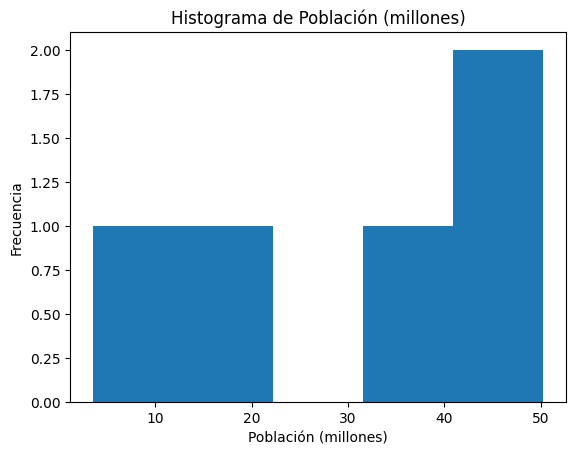

In [36]:
import matplotlib.pyplot as plt

df["Población (millones)"].plot(kind="hist", bins=5)
plt.title("Histograma de Población (millones)")
plt.xlabel("Población (millones)")
plt.ylabel("Frecuencia")
plt.show()

### Respuesta 9


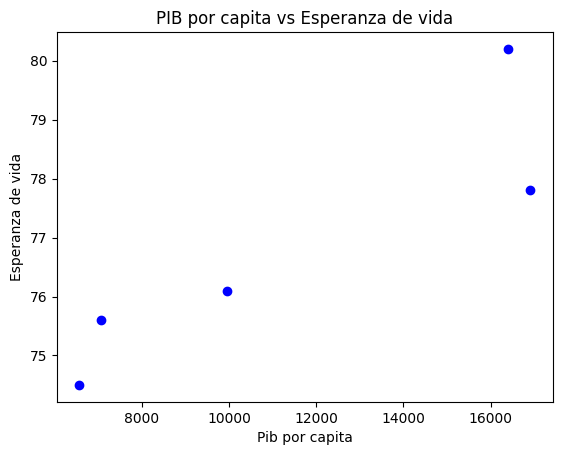

In [40]:
plt.scatter(df["PIB per cápita (USD)"], df["Esperanza de vida (años)"], color="blue")
plt.title("PIB por capita vs Esperanza de vida")
plt.xlabel("Pib por capita")
plt.ylabel("Esperanza de vida")


plt.show()